In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
teams_df = pd.read_csv(".\Teams.csv")
playoffs_df = pd.read_csv(".\PlayoffTeams.csv")
salaries_df = pd.read_csv(".\Salaries.csv")
franchises_df = pd.read_csv(".\TeamsFranchises.csv")
teams_df.head()
#teams_df.count

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [3]:
# clean up Teams dataframes to chosen years (2005-2015)

teams_df = teams_df.loc[teams_df['yearID'] > 2004]
teams_df.count
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2004]
playoffs_df.count

<bound method DataFrame.count of      yearID  round teamIDwinner lgIDwinner teamIDloser lgIDloser  wins  \
222    2005   ALCS          CHA         AL         LAA        AL     4   
223    2005  ALDS1          CHA         AL         BOS        AL     3   
224    2005  ALDS2          LAA         AL         NYA        AL     3   
225    2005   NLCS          HOU         NL         SLN        NL     4   
226    2005  NLDS1          SLN         NL         SDN        NL     3   
..      ...    ...          ...        ...         ...       ...   ...   
302    2015   NLWC          CHN         NL         PIT        NL     1   
303    2015   NLCS          NYN         NL         CHN        NL     4   
304    2015  NLDS1          CHN         NL         SLN        NL     3   
305    2015  NLDS2          NYN         NL         LAN        NL     3   
306    2015     WS          KCA         AL         NYN        NL     4   

     losses  ties  
222       1     0  
223       0     0  
224       2     0 

In [4]:
# plot_df = cleaned_df[['Drug Regimen', 'Mouse ID']].drop_duplicates().groupby('Drug Regimen').count()

winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
winners_df.head()
winners_df.count()
#losers_df
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()
losers_df.head()
losers_df.count()

print(winners_df)
print(losers_df)

    teamIDwinner
222          CHA
224          LAA
225          HOU
226          SLN
229          DET
231          OAK
233          NYN
236          BOS
238          CLE
239          COL
240          ARI
243          TBA
246          PHI
247          LAN
250          NYA
257          TEX
260          SFN
269          MIL
271          BAL
284          PIT
289          KCA
301          TOR
302          CHN
    teamIDloser
222         LAA
223         BOS
224         NYA
225         SLN
226         SDN
227         ATL
228         HOU
229         OAK
231         MIN
232         NYN
233         LAN
235         DET
236         CLE
239         ARI
240         CHN
241         PHI
242         COL
245         CHA
248         MIL
249         TBA
261         CIN
263         TEX
273         BAL
277         WAS
286         PIT
297         KCA
299         TOR


In [5]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()
playoff_count_df
#len(playoff_count_df)

SLN    18
NYA    12
DET    11
SFN    10
PHI    10
BOS    10
LAN     9
TEX     8
KCA     7
LAA     7
TBA     7
NYN     5
OAK     5
HOU     5
CHN     5
ATL     4
BAL     4
PIT     4
CHA     4
COL     4
MIL     3
CLE     3
MIN     3
ARI     3
CIN     3
TOR     2
SDN     2
WAS     2
dtype: int64

In [6]:
#Salaries csv 
salaries_df = pd.read_csv("./Salaries.csv")
salaries_df.head()
salaries_df.count

<bound method DataFrame.count of        yearID teamID lgID   playerID    salary
0        1985    ATL   NL  barkele01    870000
1        1985    ATL   NL  bedrost01    550000
2        1985    ATL   NL  benedbr01    545000
3        1985    ATL   NL   campri01    633333
4        1985    ATL   NL  ceronri01    625000
...       ...    ...  ...        ...       ...
25570    2015    WAS   NL  treinbl01    512800
25571    2015    WAS   NL  ugglada01    507500
25572    2015    WAS   NL  werthja01  21000000
25573    2015    WAS   NL  zimmejo02  16500000
25574    2015    WAS   NL  zimmery01  14000000

[25575 rows x 5 columns]>

In [7]:
#select years 2005-2015
salaries_yr = salaries_df.loc[salaries_df['yearID'] > 2004]
salaries_yr.count
#salaries_yr.head()

<bound method DataFrame.count of        yearID teamID lgID   playerID    salary
16463    2005    ARI   NL  aquingr01    325000
16464    2005    ARI   NL  brunebr01    322500
16465    2005    ARI   NL  choatra01    550000
16466    2005    ARI   NL  cintral01    360000
16467    2005    ARI   NL  clarkto02    750000
...       ...    ...  ...        ...       ...
25570    2015    WAS   NL  treinbl01    512800
25571    2015    WAS   NL  ugglada01    507500
25572    2015    WAS   NL  werthja01  21000000
25573    2015    WAS   NL  zimmejo02  16500000
25574    2015    WAS   NL  zimmery01  14000000

[9112 rows x 5 columns]>

In [113]:
#Find top salaries - using df with years 2005-2015 and selecting for playoff teams
#Looking for top 10%, narrow down to 900ish rows

#salaries_yr.describe()
salaries_yr_df = salaries_yr.loc[salaries_yr['teamID'].isin(playoff_count_df.index)]
salaries_yr_df

millions_of_dollars  = salaries_yr_df["salary"]/1000000
salaries_yr_df["Salary in Millions"] = millions_of_dollars
salaries_yr_df

salaries_millions = salaries_yr_df.loc[salaries_yr_df["Salary in Millions"]>9.5]
salaries_millions

#groupby players
top_total_spenders = salaries_millions.groupby(["playerID", "yearID"]).sum()
top_total_spenders.head()
#top_total_spenders.count()


<ipython-input-113-0ef56c76d62f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_yr_df["Salary in Millions"] = millions_of_dollars


salary  Salary in Millions
playerID  yearID                              
abreubo01 2005    13100000                13.1
          2006    13600000                13.6
          2007    15000000                15.0
          2008    16000000                16.0
anderbr04 2015    10000000                10.0

In [107]:
top_total_spenders_sorted = top_total_spenders.sort_values(["Salary in Millions"], ascending=False)
top_total_spenders_sorted.head(23)

salary  Salary in Millions  Average Salary
playerID  yearID                                              
rodrial01 2009    33000000           33.000000             NaN
          2010    33000000           33.000000             NaN
kershcl01 2015    32571000           32.571000             NaN
rodrial01 2011    32000000           32.000000             NaN
          2012    30000000           30.000000             NaN
          2013    29000000           29.000000             NaN
verlaju01 2015    28000000           28.000000             NaN
rodrial01 2008    28000000           28.000000             NaN
wellsve01 2011    26187500           26.187500             NaN
rodrial01 2005    26000000           26.000000             NaN
greinza01 2014    26000000           26.000000             NaN
howarry01 2015    25000000           25.000000             NaN
leecl02   2013    25000000           25.000000             NaN
howarry01 2014    25000000           25.000000             NaN
greinza01 2015    25000000           25.000000             NaN
leecl02   2014    25000000           25.000000             NaN
wellsve01 2013    24642857           24.642857             NaN
sabatcc01 2010    24285714           24.285714             NaN
          2013    24285714           24.285714             NaN
          2011    24285714           24.285714             NaN
wellsve01 2012    24187500           24.187500             NaN
fieldpr01 2014    24000000           24.000000             NaN
pujolal01 2015    24000000           24.000000             NaN

In [75]:
#Top 10 earners average
#1 A Rod
rodrial01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="rodrial01"]
#rod_df = rodrial01.set_index("yearID")
rodrial01


,yearID,teamID,lgID,playerID,salary,Salary in Millions
16949,2005,NYA,AL,rodrial01,26000000,26.000000
17774,2006,NYA,AL,rodrial01,21680727,21.680727
18619,2007,NYA,AL,rodrial01,22708525,22.708525
19461,2008,NYA,AL,rodrial01,28000000,28.000000
20286,2009,NYA,AL,rodrial01,33000000,33.000000
21109,2010,NYA,AL,rodrial01,33000000,33.000000
21945,2011,NYA,AL,rodrial01,32000000,32.000000
22793,2012,NYA,AL,rodrial01,30000000,30.000000
23616,2013,NYA,AL,rodrial01,29000000,29.000000
25239,2015,NYA,AL,rodrial01,22000000,22.000000


In [44]:
#2
kershcl01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="kershcl01"]
kershcl01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17566,2006,DET,AL,verlaju01,980000,0.980
18389,2007,DET,AL,verlaju01,1030000,1.030
19233,2008,DET,AL,verlaju01,1130000,1.130
20074,2009,DET,AL,verlaju01,3675000,3.675
20893,2010,DET,AL,verlaju01,6850000,6.850
21720,2011,DET,AL,verlaju01,12850000,12.850
22574,2012,DET,AL,verlaju01,20100000,20.100
23407,2013,DET,AL,verlaju01,20100000,20.100
24222,2014,DET,AL,verlaju01,20000000,20.000
25031,2015,DET,AL,verlaju01,28000000,28.000


In [45]:
#3
verlaju01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="verlaju01"]
verlaju01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17566,2006,DET,AL,verlaju01,980000,0.980
18389,2007,DET,AL,verlaju01,1030000,1.030
19233,2008,DET,AL,verlaju01,1130000,1.130
20074,2009,DET,AL,verlaju01,3675000,3.675
20893,2010,DET,AL,verlaju01,6850000,6.850
21720,2011,DET,AL,verlaju01,12850000,12.850
22574,2012,DET,AL,verlaju01,20100000,20.100
23407,2013,DET,AL,verlaju01,20100000,20.100
24222,2014,DET,AL,verlaju01,20000000,20.000
25031,2015,DET,AL,verlaju01,28000000,28.000


In [46]:
#4
wellsve01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="wellsve01"]
wellsve01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17262,2005,TOR,AL,wellsve01,3070000,3.070000
18080,2006,TOR,AL,wellsve01,4470000,4.470000
18924,2007,TOR,AL,wellsve01,8787500,8.787500
19779,2008,TOR,AL,wellsve01,3687500,3.687500
20595,2009,TOR,AL,wellsve01,4687500,4.687500
21423,2010,TOR,AL,wellsve01,15687500,15.687500
21832,2011,LAA,AL,wellsve01,26187500,26.187500
22658,2012,LAA,AL,wellsve01,24187500,24.187500
23621,2013,NYA,AL,wellsve01,24642857,24.642857


In [47]:
#5
greinza01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="greinza01"]
greinza01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
16808,2005,KCA,AL,greinza01,330500,0.3305
17635,2006,KCA,AL,greinza01,365500,0.3655
18463,2007,KCA,AL,greinza01,407000,0.4070
19308,2008,KCA,AL,greinza01,1400000,1.4000
20145,2009,KCA,AL,greinza01,3750000,3.7500
20966,2010,KCA,AL,greinza01,7250000,7.2500
21876,2011,MIL,NL,greinza01,13500000,13.5000
22728,2012,MIL,NL,greinza01,13500000,13.5000
23497,2013,LAN,NL,greinza01,21000000,21.0000
24307,2014,LAN,NL,greinza01,26000000,26.0000


In [48]:
#6
howarry01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="howarry01"]
howarry01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17848,2006,PHI,NL,howarry01,355000,0.355
18696,2007,PHI,NL,howarry01,900000,0.900
19534,2008,PHI,NL,howarry01,10000000,10.000
20358,2009,PHI,NL,howarry01,15000000,15.000
21190,2010,PHI,NL,howarry01,19000000,19.000
22016,2011,PHI,NL,howarry01,20000000,20.000
22866,2012,PHI,NL,howarry01,20000000,20.000
23694,2013,PHI,NL,howarry01,20000000,20.000
24500,2014,PHI,NL,howarry01,25000000,25.000
25318,2015,PHI,NL,howarry01,25000000,25.000


In [49]:
#7
leecl02 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="leecl02"]
leecl02

,yearID,teamID,lgID,playerID,salary,Salary in Millions
16671,2005,CLE,AL,leecl02,345000,0.3450
17497,2006,CLE,AL,leecl02,406200,0.4062
18323,2007,CLE,AL,leecl02,3000000,3.0000
19170,2008,CLE,AL,leecl02,4000000,4.0000
20009,2009,CLE,AL,leecl02,6000000,6.0000
22019,2011,PHI,NL,leecl02,11000000,11.0000
22868,2012,PHI,NL,leecl02,21500000,21.5000
23698,2013,PHI,NL,leecl02,25000000,25.0000
24502,2014,PHI,NL,leecl02,25000000,25.0000


In [51]:
#8
sabatcc01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="sabatcc01"]
sabatcc01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
16679,2005,CLE,AL,sabatcc01,5250000,5.250000
17504,2006,CLE,AL,sabatcc01,7000000,7.000000
18332,2007,CLE,AL,sabatcc01,8750000,8.750000
19177,2008,CLE,AL,sabatcc01,11000000,11.000000
20287,2009,NYA,AL,sabatcc01,15285714,15.285714
21110,2010,NYA,AL,sabatcc01,24285714,24.285714
21946,2011,NYA,AL,sabatcc01,24285714,24.285714
22795,2012,NYA,AL,sabatcc01,23000000,23.000000
23617,2013,NYA,AL,sabatcc01,24285714,24.285714
24425,2014,NYA,AL,sabatcc01,23000000,23.000000


In [54]:
#9
fieldpr01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="fieldpr01"]
fieldpr01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17711,2006,MIL,NL,fieldpr01,329500,0.3295
18547,2007,MIL,NL,fieldpr01,415000,0.4150
19388,2008,MIL,NL,fieldpr01,670000,0.6700
20218,2009,MIL,NL,fieldpr01,7000000,7.0000
21042,2010,MIL,NL,fieldpr01,11000000,11.0000
21872,2011,MIL,NL,fieldpr01,15500000,15.5000
22558,2012,DET,AL,fieldpr01,23000000,23.0000
23393,2013,DET,AL,fieldpr01,23000000,23.0000
24689,2014,TEX,AL,fieldpr01,24000000,24.0000
25501,2015,TEX,AL,fieldpr01,24000000,24.0000


In [111]:
#10
pujolal01 = salaries_yr_df.loc[salaries_yr_df["playerID"]=="pujolal01"]
pujolal01

,yearID,teamID,lgID,playerID,salary,Salary in Millions
17170,2005,SLN,NL,pujolal01,11000000,11.000000
17988,2006,SLN,NL,pujolal01,14000000,14.000000
18834,2007,SLN,NL,pujolal01,12937813,12.937813
19686,2008,SLN,NL,pujolal01,13870949,13.870949
20501,2009,SLN,NL,pujolal01,14427326,14.427326
21331,2010,SLN,NL,pujolal01,14595953,14.595953
22170,2011,SLN,NL,pujolal01,14508395,14.508395
22651,2012,LAA,AL,pujolal01,12000000,12.000000
23475,2013,LAA,AL,pujolal01,16000000,16.000000
24283,2014,LAA,AL,pujolal01,23000000,23.000000


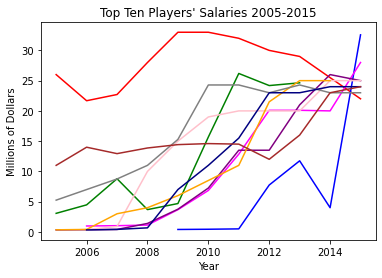

In [118]:
x_axis = rodrial01.loc[:,"yearID"]
x_axis2 = kershcl01.loc[:,"yearID"]
x_axis3 = verlaju01.loc[:,"yearID"]
x_axis4 = wellsve01.loc[:,"yearID"]
x_axis5 = greinza01.loc[:,"yearID"]
x_axis6 = howarry01.loc[:,"yearID"]
x_axis7 = leecl02.loc[:,"yearID"]
x_axis8 = sabatcc01.loc[:,"yearID"]
x_axis9 = fieldpr01.loc[:,"yearID"]
x_axis10 = pujolal01.loc[:,"yearID"]

rodrial01_sal = rodrial01.loc[:,"Salary in Millions"]
kershcl01_sal = kershcl01.loc[:,"Salary in Millions"]
verlaju01_sal = verlaju01.loc[:,"Salary in Millions"]
wellsve01_sal = wellsve01.loc[:,"Salary in Millions"]
greinza01_sal = greinza01.loc[:,"Salary in Millions"]  
howarry01_sal = howarry01.loc[:,"Salary in Millions"] 
leecl02_sal = leecl02.loc[:,"Salary in Millions"]
sabatcc01_sal = sabatcc01.loc[:,"Salary in Millions"]
fieldpr01_sal = fieldpr01.loc[:,"Salary in Millions"]  
pujolal01_sal = pujolal01.loc[:,"Salary in Millions"]
    
rod = plt.plot(x_axis, rodrial01_sal, color="red", label="1")
ker = plt.plot(x_axis2, kershcl01_sal, color="blue", label="2")
ver = plt.plot(x_axis3, verlaju01_sal, color="magenta", label="3")
wel = plt.plot(x_axis4, wellsve01_sal, color="green", label="4")
gre = plt.plot(x_axis5, greinza01_sal, color="purple", label="5")
how = plt.plot(x_axis6, howarry01_sal, color="pink", label="6")
lee = plt.plot(x_axis7, leecl02_sal, color="orange", label="7")
sab = plt.plot(x_axis8, sabatcc01_sal, color="gray", label="8")
fie = plt.plot(x_axis9, fieldpr01_sal, color="navy", label="9")
puj = plt.plot(x_axis10, pujolal01_sal, color="brown", label="10")

plt.title("Top Ten Players' Salaries 2005-2015")
plt.xlabel("Year")
plt.ylabel("Millions of Dollars")

plt.show()

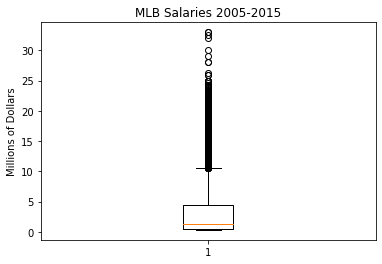

In [12]:
salaries = salaries_yr_df["Salary in Millions"]
fig1, ax1 = plt.subplots()
ax1.set_title('MLB Salaries 2005-2015')
ax1.set_ylabel('Millions of Dollars')
ax1.boxplot(salaries)
plt.show()

In [114]:
#Individual years graphed: Not sure if needed
# salaries_2005_df = salaries_yr_df.loc[salaries_yr_df["yearID"]==2005]
# salaries_2005_df

# salaries_2005 = salaries_2005_df["Salary in Millions"]

# fig1, ax1 = plt.subplots()
# ax1.set_title('MLB Salaries 2005')
# ax1.set_ylabel('Millions of Dollars')
# ax1.boxplot(salaries_2005)
# plt.show()

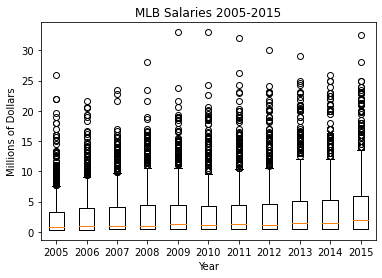

In [24]:
ten_year_salary_plot_data = [salaries_2005, salaries_2006, salaries_2007, salaries_2008, salaries_2009, salaries_2010, salaries_2011,
                            salaries_2012, salaries_2013, salaries_2014, salaries_2015]
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

fig1, ax1 = plt.subplots()
ax1.set_title("MLB Salaries 2005-2015")
ax1.set_xlabel("Year")
ax1.set_ylabel("Millions of Dollars")
ax1.boxplot(ten_year_salary_plot_data, labels = years)
plt.savefig("boxplot")
plt.show()
